# Exercises

- Within your codeup-data-science directory, create a new directory named clustering-exercises. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

- Save your clustering work in your clustering-exercises repo. Then add, commit, and push your changes.

- For example, if the exercise directs you to create a file named myfile.py, you should have clustering/myfile.py in your repository.

- If a file extension is specified, you should create that specific file. If there is not file extension specified, you may either create a python script or a jupyter notebook for the exercise.

Workflow
Throughout the exercises, you may wish to do your work in a notebook, then transfer any functions you've created to an external python script.

Keep in mind this is not always a linear process! You will probably be cycling between a notebook and an external python script frequently.

Remember to run your code often to check for correct output and/or errors.

Acquire (acquire.py)

# Zillow

- For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

- You will have a zillow.ipynb file and a helper file for each section in the pipeline.

# acquire & summarize









In [1]:
import acquire
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


### 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

- Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
- Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
- Only include properties that include a latitude and longitude value.

In [2]:
df = acquire.new_zillow_data_c()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,None,None,Central,Condominium,None,None


In [3]:
df.shape

(77574, 68)

In [4]:
df = pd.read_csv('zillow.csv')

In [5]:
df.shape

(77574, 69)

In [6]:
df.head()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


### 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [7]:
df.describe()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,77574.000000,7.757400e+04,7.757400e+04,25006.000000,206.000000,50.000000,77574.000000,77574.000000,15.000000,49808.000000,...,17596.000000,172.0,7.745900e+04,7.757300e+04,77574.0,7.757200e+04,77569.000000,2900.000000,7.732700e+04,77574.000000
mean,38786.500000,1.495340e+06,1.300630e+07,1.812045,7.388350,679.720000,2.298521,3.053252,3.933333,6.533830,...,1.434246,1.0,1.892829e+05,4.901477e+05,2016.0,3.011468e+05,5995.855691,14.088276,6.049666e+13,0.016805
std,22393.829228,8.609689e+05,3.478043e+06,2.965823,2.734542,689.703546,0.996706,1.140447,0.258199,1.722041,...,0.544518,0.0,2.304149e+05,6.538059e+05,0.0,4.927317e+05,7628.912331,2.181281,1.533386e+12,0.170742
min,0.000000,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,19393.250000,7.520875e+05,1.153819e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,...,1.000000,1.0,8.418200e+04,2.068980e+05,2016.0,8.529200e+04,2712.610000,14.000000,6.037311e+13,-0.024310
50%,38786.500000,1.498169e+06,1.253050e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,...,1.000000,1.0,1.364070e+05,3.588790e+05,2016.0,2.031810e+05,4448.300000,15.000000,6.037603e+13,0.006673
75%,58179.750000,2.240588e+06,1.421124e+07,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,...,2.000000,1.0,2.187340e+05,5.690000e+05,2016.0,3.667610e+05,6926.820000,15.000000,6.059042e+13,0.039292
max,77573.000000,2.982274e+06,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77574 non-null  int64  
 1   id                            77574 non-null  int64  
 2   parcelid                      77574 non-null  int64  
 3   airconditioningtypeid         25006 non-null  float64
 4   architecturalstyletypeid      206 non-null    float64
 5   basementsqft                  50 non-null     float64
 6   bathroomcnt                   77574 non-null  float64
 7   bedroomcnt                    77574 non-null  float64
 8   buildingclasstypeid           15 non-null     float64
 9   buildingqualitytypeid         49808 non-null  float64
 10  calculatedbathnbr             76959 non-null  float64
 11  decktypeid                    614 non-null    float64
 12  finishedfloor1squarefeet      6035 non-null   float64
 13  c

In [9]:
df.dtypes

Unnamed: 0                    int64
id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
                             ...   
buildingclassdesc            object
heatingorsystemdesc          object
propertylandusedesc          object
storydesc                    object
typeconstructiondesc         object
Length: 69, dtype: object

In [10]:
# looking for shape of data frames
df.shape

(77574, 69)

In [11]:
df.head()

,Unnamed: 0,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [12]:
col_list = ['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyflag', 'taxdelinquencyyear', 'censustractandblock', 'logerror', 'transactiondate']

In [13]:
# look at nulls in each columns
df.isnull().sum().sort_values(ascending = False)[:47]

buildingclasstypeid             77559
buildingclassdesc               77559
finishedsquarefeet13            77532
storytypeid                     77524
storydesc                       77524
basementsqft                    77524
yardbuildingsqft26              77504
fireplaceflag                   77402
architecturalstyletypeid        77368
architecturalstyledesc          77368
typeconstructiondesc            77352
typeconstructiontypeid          77352
finishedsquarefeet6             77188
pooltypeid10                    77109
decktypeid                      76960
poolsizesum                     76705
pooltypeid2                     76500
hashottuborspa                  76035
yardbuildingsqft17              75181
taxdelinquencyflag              74674
taxdelinquencyyear              74674
finishedsquarefeet15            74547
finishedsquarefeet50            71539
finishedfloor1squarefeet        71539
fireplacecnt                    69287
threequarterbathnbr             67469
pooltypeid7 

Text(0.5, 1.0, 'tax value dollar cnt')

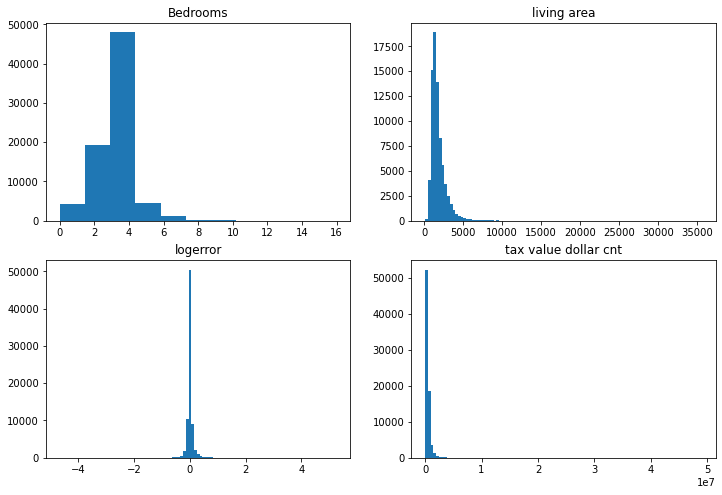

In [14]:
# plot some distributions

plt.figure(figsize = (12, 8))
plt.subplot(221)
plt.hist(df.bedroomcnt, bins = 11)
plt.title('Bedrooms')


plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet, bins = 101)
plt.title('living area')


plt.subplot(223)
plt.hist(df.logerror, bins = 101)
plt.title('logerror')

plt.subplot(224)
plt.hist(df.taxvaluedollarcnt, bins = 101)
plt.title('tax value dollar cnt')

### 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

|                         | num_rows_missing | pct_rows_missing 
|---|---|---|
|parcelid                 |  0         | 0.000000                                
|airconditiontypeid       |  29041     | 0.535486   
|architecturalstyletypeid |  54232     | 0.999982  

In [15]:
# looking for sum of nulls in columns
df.isnull().sum()

Unnamed: 0                      0
id                              0
parcelid                        0
airconditioningtypeid       52568
architecturalstyletypeid    77368
                            ...  
buildingclassdesc           77559
heatingorsystemdesc         28005
propertylandusedesc             0
storydesc                   77524
typeconstructiondesc        77352
Length: 69, dtype: int64

In [16]:
# function to count nulls by column
def nulls_by_col(df):
    num_missing = df.isnull().sum()
    rows = df.shape[0]
    pct_missing = num_missing /rows
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pct_rows_missing': pct_missing})
    return cols_missing

In [17]:
nulls_by_column = nulls_by_col(df)
nulls_by_column.sort_values(by='pct_rows_missing', ascending = False).head()

,num_rows_missing,pct_rows_missing
buildingclasstypeid,77559,0.999807
buildingclassdesc,77559,0.999807
finishedsquarefeet13,77532,0.999459
storytypeid,77524,0.999355
storydesc,77524,0.999355


### 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

| num_cols_missing | pct_cols_missing | num_rows 
|---|---|---|
|23                 |  38.333         | 108                               
|24                 |  40.000         | 123   
|25                 |  41.667         | 5280  


In [18]:
pd.DataFrame(df.isnull().sum(axis = 1).value_counts()).reset_index()

,index,0
0,33,14817
1,34,13356
2,32,12606
3,31,9911
4,36,5793
5,29,5285
6,35,5163
7,37,3630
8,30,3465
9,38,1932


In [19]:
df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index().groupby('num_cols_missing')\
.count().reset_index().rename(columns = {'index': 'num_rows'})

df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
df2.head()

,num_cols_missing,num_rows,pct_cols_missing
0,23,2,0.333333
1,24,13,0.347826
2,25,24,0.362319
3,26,65,0.376812
4,27,316,0.391304


In [20]:
def cols_missing(df):
    df2 = pd.DataFrame(df.isnull().sum(axis =1), columns = ['num_cols_missing']).reset_index()\
    .groupby('num_cols_missing').count().reset_index().\
    rename(columns = {'index': 'num_rows' })
    df2['pct_cols_missing'] = df2.num_cols_missing/df.shape[1]
    return df2

In [21]:
# sort valyes by pc_col_missing
cols_missing(df).sort_values(by = ['pct_cols_missing'], ascending = False)

,num_cols_missing,num_rows,pct_cols_missing
25,48,3,0.695652
24,47,3,0.681159
23,46,5,0.666667
22,45,50,0.652174
21,44,79,0.637681
20,43,29,0.623188
19,42,26,0.608696
18,41,29,0.594203
17,40,230,0.579710
16,39,285,0.565217


# Prepare

### 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77574 non-null  int64  
 1   id                            77574 non-null  int64  
 2   parcelid                      77574 non-null  int64  
 3   airconditioningtypeid         25006 non-null  float64
 4   architecturalstyletypeid      206 non-null    float64
 5   basementsqft                  50 non-null     float64
 6   bathroomcnt                   77574 non-null  float64
 7   bedroomcnt                    77574 non-null  float64
 8   buildingclasstypeid           15 non-null     float64
 9   buildingqualitytypeid         49808 non-null  float64
 10  calculatedbathnbr             76959 non-null  float64
 11  decktypeid                    614 non-null    float64
 12  finishedfloor1squarefeet      6035 non-null   float64
 13  c

In [23]:
# Checking the shape of DataFrame
df.shape

(77574, 69)

In [24]:
# Look at value counts for 'unitcnt'
df.unitcnt.value_counts(dropna = False)

1.0      47412
NaN      26872
2.0       2031
4.0        726
3.0        529
45.0         1
42.0         1
6.0          1
237.0        1
Name: unitcnt, dtype: int64

In [25]:
# Restricting dataframe to only properties that meet single unit criteria

single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
df = df[df.propertylandusetypeid.isin(single_use)]

# Restrict df to only those properties with at least 1 bath & bed and living_area > 350 sqft
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>350)]

In [26]:
# check # of columns and rows left
df.shape

(71355, 69)

### 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
- A dataframe
- A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
- A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

- The output:
- The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

- hint:
- Look up the dropna documentation.
- You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
- Make use of inplace, i.e. inplace=True/False.

In [27]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [28]:
# use the function defined above:

df = handle_missing_values(df)

In [29]:
# check shape to see how many columns and rows were dropped

df.shape

(71355, 35)

# 3. Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71355 entries, 0 to 77573
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    71355 non-null  int64  
 1   id                            71355 non-null  int64  
 2   parcelid                      71355 non-null  int64  
 3   bathroomcnt                   71355 non-null  float64
 4   bedroomcnt                    71355 non-null  float64
 5   buildingqualitytypeid         44841 non-null  float64
 6   calculatedbathnbr             71340 non-null  float64
 7   calculatedfinishedsquarefeet  71355 non-null  float64
 8   finishedsquarefeet12          71188 non-null  float64
 9   fips                          71355 non-null  float64
 10  fullbathcnt                   71340 non-null  float64
 11  heatingorsystemtypeid         46412 non-null  float64
 12  latitude                      71355 non-null  float64
 13  l

In [31]:
# look at number of nulls for each column
df.isnull().sum()

Unnamed: 0                          0
id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26514
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              167
fips                                0
fullbathcnt                        15
heatingorsystemtypeid           24943
latitude                            0
longitude                           0
lotsizesquarefeet                8034
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              26221
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
unitcnt                         26195
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedoll

In [32]:
# use your judgement to remove certain columns which you don't need

cols_to_remove = ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc', 'unitcnt']

In [33]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [34]:
# use the function defined above to remove the columns not needed:

df = remove_columns(df, cols_to_remove)

In [35]:
# take a look at null counts again

df.isnull().sum()

Unnamed: 0                          0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26514
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8034
rawcensustractandblock              0
regionidcity                     1322
regionidcounty                      0
regionidzip                        40
roomcnt                             0
yearbuilt                          35
structuretaxvaluedollarcnt         75
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
heatingorsystemdesc             24943
dtype: int64

In [36]:
# let's look at heatingorsystemdesc value counts

df.heatingorsystemdesc.value_counts(dropna = False)

Central       31357
NaN           24943
Floor/Wall    13229
Yes             850
Forced air      775
Solar           101
None             60
Radiant          23
Baseboard        13
Gravity           3
Heat Pump         1
Name: heatingorsystemdesc, dtype: int64

In [37]:
df.fips.value_counts()

6037.0    45320
6059.0    20289
6111.0     5746
Name: fips, dtype: int64

In [38]:
# how many missing values by county?
df[df.fips == 6111].heatingorsystemdesc.value_counts(dropna = False)

NaN    5746
Name: heatingorsystemdesc, dtype: int64

In [39]:
# I assume that since this is Southern CA, 'null' probably means 'None' for heating system

df.drop(columns = 'heatingorsystemdesc', inplace = True)

In [40]:
# buildingqualitytypeid
# Overall assessment of condition of the building from 
# low number = best quality
# higher numbers = worse quality

df.buildingqualitytypeid.value_counts(dropna = False)

NaN     26514
8.0     13404
6.0     12673
4.0      8226
7.0      5505
9.0      2113
5.0      1499
11.0      846
10.0      301
3.0       149
12.0      113
1.0         9
2.0         3
Name: buildingqualitytypeid, dtype: int64

In [41]:
df[df.fips == 6059].buildingqualitytypeid.value_counts(dropna = False)

NaN    20289
Name: buildingqualitytypeid, dtype: int64

In [42]:
# what is the median value of buildingqualitytypeid?

# df.buildingqualitytypeid.median()

In [43]:
# should I fill missing values for buildingqualitytypeid with median value?
# df.buildingqualitytypeid.fillna(6.0, inplace = True)

In [44]:
# I should just drop the buildingqualitytypeid column for now.
df.drop(columns = 'buildingqualitytypeid', inplace = True)

In [45]:
df.isnull().sum()

Unnamed: 0                         0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet               8034
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

<AxesSubplot:>

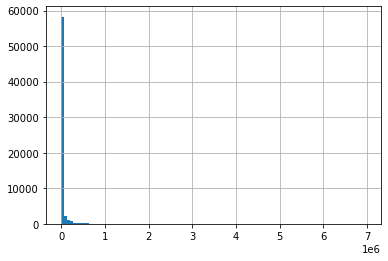

In [46]:
# look at lot-size distribution
df.lotsizesquarefeet.hist(bins = 100)

In [47]:
# what is the median lot size?

df.lotsizesquarefeet.median()

7313.0

In [48]:
# fill missing values with median null sizes

df.lotsizesquarefeet.fillna(7313, inplace = True)

In [49]:
df.isnull().sum()

Unnamed: 0                         0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
rawcensustractandblock             0
regionidcity                    1322
regionidcounty                     0
regionidzip                       40
roomcnt                            0
yearbuilt                         35
structuretaxvaluedollarcnt        75
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          5
logerror                           0
transactiondate                    0
dtype: int64

In [50]:
# I am going to drop the rest of nulls 

df.dropna(inplace = True)

In [51]:
# How many rows and columns are left?

df.shape

(69919, 22)

In [52]:
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate
0,0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01
1,1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01
2,2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01
3,3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01
4,4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,96451.0,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01


# Check for outliers in select columns

<AxesSubplot:ylabel='taxvaluedollarcnt'>

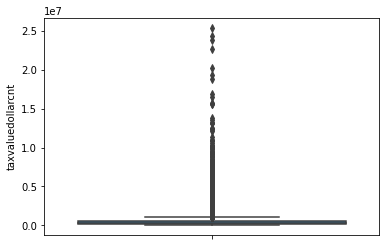

In [53]:
# plt.subplot(221)
sns.boxplot(y = 'taxvaluedollarcnt', data = df)

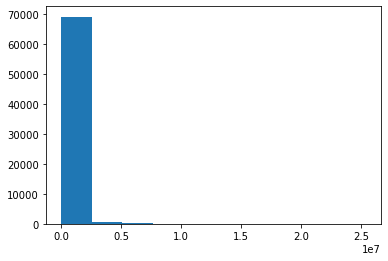

In [54]:
#Histograms for taxvalue of properties

plt.hist(df.taxvaluedollarcnt);

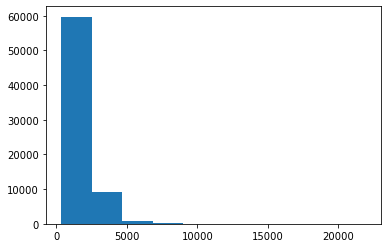

In [55]:
#Histograms for covered sq ft of properties

plt.hist(df.calculatedfinishedsquarefeet);

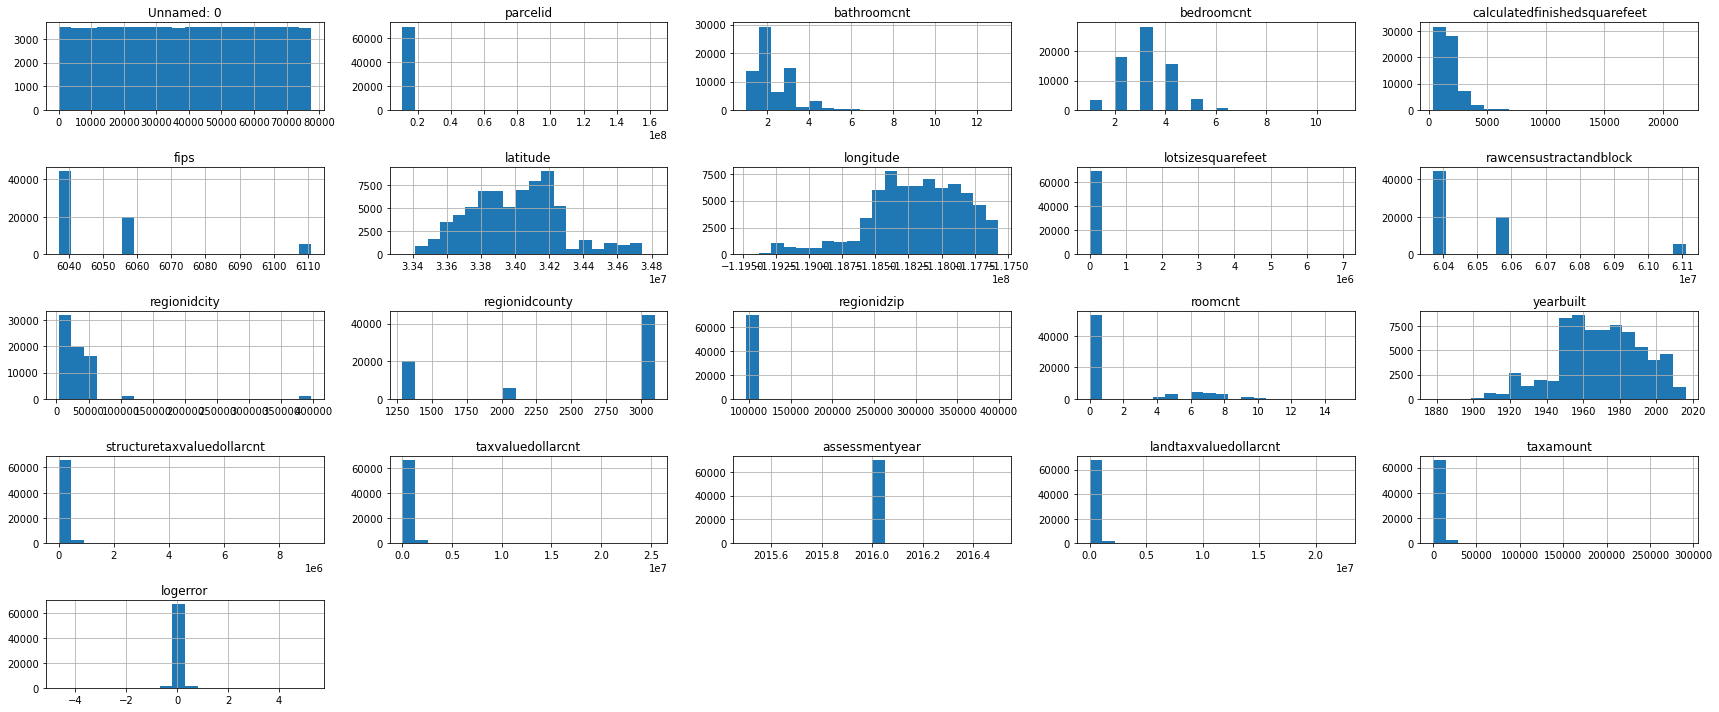

In [56]:
# look at distributions for all columns

df.hist(figsize=(24, 10), bins=20)
plt.tight_layout();

In [57]:
# Remove properties valued more than 5 million dollars

df = df[df.taxvaluedollarcnt < 5_000_000]
df.shape

(69729, 22)

In [58]:
# Remove properties valued more than 8000 square feet

df[df.calculatedfinishedsquarefeet < 8000]
df.shape

(69729, 22)

In [59]:
# Function to read and wrangle data:

def wrangle_zillow():
    df = pd.read_csv('zillow.csv')
    
    # Restrict df to only properties that meet single unit use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

    # Handle missing values i.e. drop columns and rows based on a threshold
    df = handle_missing_values(df)
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))    
    # drop columns not needed
    df = remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc','heatingorsystemdesc','unitcnt'
                            ,'buildingqualitytypeid'])


    # replace nulls in unitcnt with 1
#     df.unitcnt.fillna(1, inplace = True)
    
    # assume that since this is Southern CA, null means 'None' for heating system
#     df.heatingorsystemdesc.fillna('None', inplace = True)
    
    # replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7313, inplace = True)
#     df.buildingqualitytypeid.fillna(6.0, inplace = True)

    # Columns to look for outliers
    df = df[df.taxvaluedollarcnt < 5_000_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    # Just to be sure we caught all nulls, drop them here
    df = df.dropna()
    
    return df

In [60]:
import numpy as np
df = wrangle_zillow()
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
4,4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Los_Angeles


In [61]:
df.shape

(69729, 23)

# wrangle_zillow.py

### Functions of the work above needed to acquire and prepare a new sample of data.

### Mall Customers

# notebook

### 1. Acquire data from mall_customers.customers in mysql database.

In [62]:
import acquire
df = acquire.new_mall_customers()
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
import pandas as pd
df = pd.read_csv('mallcustomers.csv')
df.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


### 2. Summarize data (include distributions and descriptive statistics).

In [64]:
# shape of df
df.shape

(200, 6)

In [65]:
# describe df
df.describe()

,Unnamed: 0,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,100.500000,38.850000,60.560000,50.200000
std,57.879185,57.879185,13.969007,26.264721,25.823522
min,0.000000,1.000000,18.000000,15.000000,1.000000
25%,49.750000,50.750000,28.750000,41.500000,34.750000
50%,99.500000,100.500000,36.000000,61.500000,50.000000
75%,149.250000,150.250000,49.000000,78.000000,73.000000
max,199.000000,200.000000,70.000000,137.000000,99.000000


In [66]:
# df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      200 non-null    int64 
 1   customer_id     200 non-null    int64 
 2   gender          200 non-null    object
 3   age             200 non-null    int64 
 4   annual_income   200 non-null    int64 
 5   spending_score  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [67]:
df.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [68]:
# getting sum of nulls
df.isnull().sum()

Unnamed: 0        0
customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [69]:
df.gender.value_counts()

Female    112
Male       88
Name: gender, dtype: int64

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'customer_id'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>, <AxesSubplot:>]],
      dtype=object)

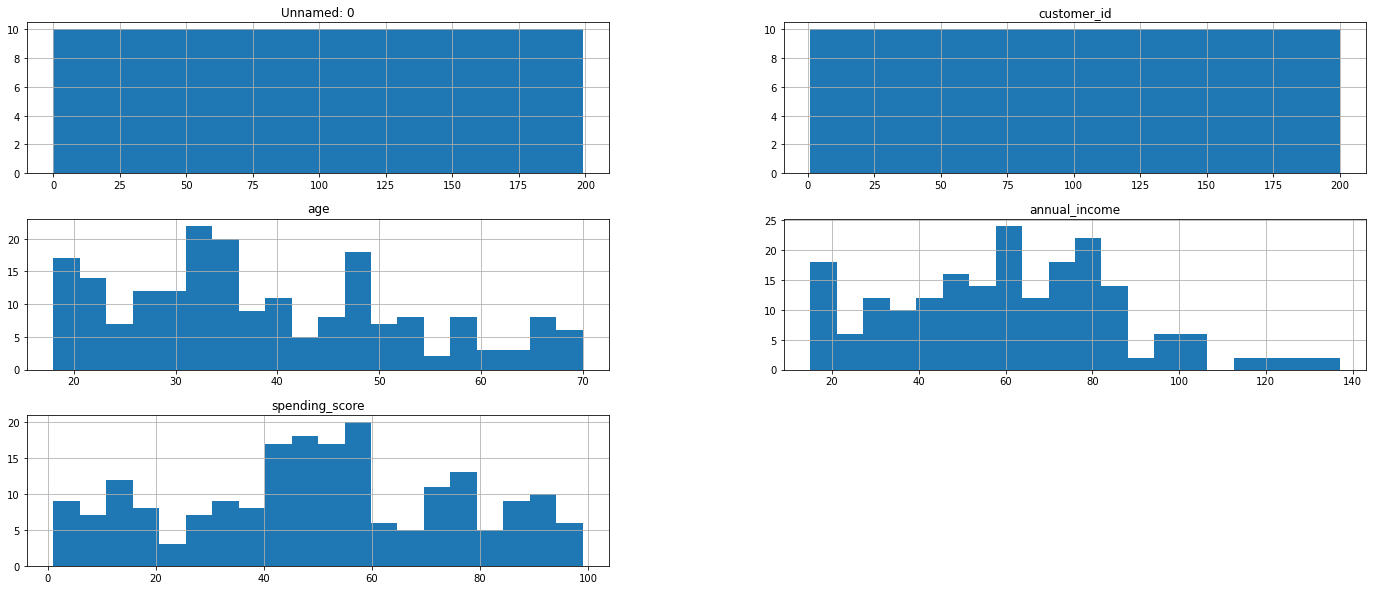

In [70]:
df.hist(figsize = (24, 10), bins = 20)

<AxesSubplot:title={'center':'Spending Score'}, ylabel='spending_score'>

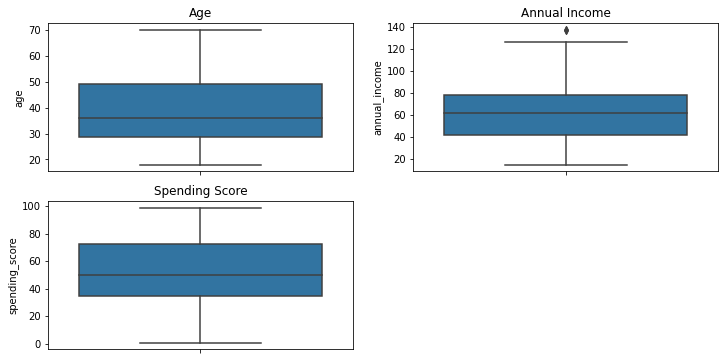

In [71]:
# Boxplot for Age, Annual Income and Spending Score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,6))

plt.subplot(221)
sns.boxplot(y = 'age', data = df)
plt.title('Age')

plt.subplot(222)
plt.title('Annual Income')
sns.boxplot(y = 'annual_income', data = df)

plt.subplot(223)
plt.title('Spending Score')
sns.boxplot(y = 'spending_score', data = df)

### It looks like we have only few outliers in annual income

### 3. Detect outliers using IQR.

In [72]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [73]:
df = remove_outliers(df, 1.5, ['age', 'annual_income', 'spending_score'])

In [74]:
df.shape

(198, 6)

In [75]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [76]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
df.drop(columns = ['customer_id'], inplace = True)

In [78]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 5. Encode categorical columns using a one hot encoder (pd.get_dummies).

In [79]:
# Encoding the gender column
dummy_df = pd.get_dummies(df.gender, drop_first = True)


In [80]:
# getting head of dummy
dummy_df.head()

,Male
0,1
1,1
2,0
3,0
4,0


In [81]:
# concat the dummies df with original df.
df = pd.concat ([df, dummy_df], axis = 1)

In [82]:
# drop the gender column
df = df.drop(columns = ['gender'])

In [83]:
df.head()

,age,annual_income,spending_score,Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


### 4. Split data (train, validate, and test split).

In [84]:
from sklearn.model_selection import train_test_split
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)

In [85]:
print(train.shape)
print(validate.shape)
print(test.shape)

(110, 4)
(48, 4)
(40, 4)


### 6. Handles missing values.

In [86]:
# Checking missing values to handle
df.isnull().sum()

age               0
annual_income     0
spending_score    0
Male              0
dtype: int64

In [87]:
# No missing values found

### 7. Scaling

In [88]:

def min_max_scaler1(train, validate, test):
    # MinMax Scaling
    scaler = MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(train)

    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    return scaler, train, validate, test

In [89]:
# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler1(train, validate, test)

In [90]:
train_scaled.head()

,age,annual_income,spending_score,Male
45,24,39,65,0
39,20,37,75,0
11,35,19,99,0
171,28,87,75,1
95,24,60,52,1


In [91]:
# defining min_max_scalar
def min_max_scaler(train, validate, test):   
    
    num_vars = list(train.select_dtypes('number').columns) 
    # num_vars will give column heads on running
    scaler = MinMaxScaler(copy= True, feature_range = (0, 1))
    train[num_vars]= scaler.fit_transform(train[num_vars])
    validate[num_vars]= scaler.transform(validate[num_vars])
    test[num_vars]= scaler.transform(test[num_vars])

    return scaler, train, validate, test


In [92]:
train.select_dtypes('number').columns

Index(['age', 'annual_income', 'spending_score', 'Male'], dtype='object')

In [93]:
# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler(train, validate, test)

In [94]:
train_scaled.head()

,age,annual_income,spending_score,Male
45,0.115385,0.216216,0.653061,0.0
39,0.038462,0.198198,0.755102,0.0
11,0.326923,0.036036,1.000000,0.0
171,0.192308,0.648649,0.755102,1.0
95,0.115385,0.405405,0.520408,1.0


In [95]:
scaler

MinMaxScaler()

# wrangle_mall.py

### 1. Acquire data from mall_customers.customers in mysql database.

In [96]:
def new_mall_customers():
    '''
    This function reads the mall customer data from the Codeup db into a df and returns the df.
    '''
    # Create SQL query.
    sql_query_mall = """
    select * from customers;
    """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query_mall, get_connection('mall_customers'))
    
    # Write DataFrame to a csv file.
    df.to_csv('mallcustomers.csv')
    
    
    return df

In [97]:
import wrangle_mall
df = wrangle_mall.new_mall_customers()

In [98]:
# One function to do all
def mall_final():
    '''
    This function reads the mall customer data from the Codeup db into a df and returns the df.
    '''
    # Create SQL query.
    sql_query_mall = """
    select * from customers;
    """
    
    # Read in DataFrame from Codeup db.
    df = pd.read_sql(sql_query_mall, get_connection('mall_customers'))
    
    # remove outliers 
    df = remove_outliers(df, k, ['age', 'spending_score', 'annual_income'])
    
    # Encoding the gender column
    dummy_df = pd.get_dummies(df.gender, drop_first = True)

    # concat the dummies df with original df.
    df = pd.concat ([df, dummy_df], axis = 1)
    
    # splitting data into data set
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    
    return train, validate, test
    
    

In [99]:
def remove_outliers(df, k , col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [100]:
wrangle_mall.mall_final()

(     customer_id  gender  age  annual_income  spending_score  Male
 45            46  Female   24             39              65     0
 39            40  Female   20             37              75     0
 11            12  Female   35             19              99     0
 171          172    Male   28             87              75     1
 95            96    Male   24             60              52     1
 ..           ...     ...  ...            ...             ...   ...
 80            81    Male   57             54              51     1
 129          130    Male   38             71              75     1
 140          141  Female   57             75               5     0
 135          136  Female   29             73              88     0
 58            59  Female   27             46              51     0
 
 [110 rows x 6 columns],
      customer_id  gender  age  annual_income  spending_score  Male
 176          177    Male   58             88              15     1
 149          150    

### 3. One-hot-encoding (pd.get_dummies)

In [101]:
# Encoding the gender column
dummy_df = pd.get_dummies(df.gender, drop_first = True)

# concat the dummies df with original df.
df = pd.concat ([df, dummy_df], axis = 1)

### 2. Split the data into train, validate, and split

In [102]:
def split_mall(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    return train, validate, test

### 4. Missing values

In [103]:
# There was no missing values

### 5. Scaling

In [106]:
import sklearn
def min_max_scaler1(train, validate, test):
    # MinMax Scaling
    scaler = sklearn.preprocessing.MinMaxScaler()
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(train)

    train_scaled = scaler.transform(train)
    validate_scaled = scaler.transform(validate)
    test_scaled = scaler.transform(test)
    return scaler, train, validate, test

In [107]:
# use the scaler
scaler, train_scaled, validate_scaled, test_scaled = min_max_scaler1(train, validate, test)

In [110]:
train_scaled.head()

,age,annual_income,spending_score,Male
45,0.115385,0.216216,0.653061,0.0
39,0.038462,0.198198,0.755102,0.0
11,0.326923,0.036036,1.000000,0.0
171,0.192308,0.648649,0.755102,1.0
95,0.115385,0.405405,0.520408,1.0
